In [18]:
#gauss函数用于生成一个服从高斯分布（也称为正态分布）的随机数，其参数是分布的均值和标准差。在这个语句中，它是为了生成一个随机的扰动值，用于构造随机游走过程或其它随机模型。
from random import gauss 
import matplotlib.pyplot as plt
import numpy as np
#用于拟合ARCH和GARCH模型。ARCH（自回归条件异方差）模型和GARCH（广义自回归条件异方差）模型都是用于建模时间序列方差的统计模型，其中方差随时间变化。
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

# GARCH(2,2) Model

$$
a_t = \varepsilon_t \sqrt{\omega + \alpha_1 a_{t-1}^2 + \alpha_2 a_{t-2}^2 + \beta_1 \sigma_{t-1}^2 + \beta_2 \sigma_{t-2}^2}
$$

$$
a_0, a_1 \sim \mathcal{N}(0,1)
$$

$$
\sigma_0 =1, \sigma_1 = 1
$$

$$
\varepsilon_t \sim \mathcal{N}(0,1)
$$

生成了一个ARCH(2)模型的时间序列，其中$n=1000$表示生成的时间序列长度为1000。参数$\omega=0.5$表示噪声方差的基准水平。参数$\alpha_1=0.1$和$\alpha_2=0.2$表示时间序列的方差受自身延迟1期和2期的方差的影响。参数$\beta_1=0.3$和$\beta_2=0.4$表示时间序列的方差受自身方差延迟1期和2期以及噪声方差的影响。$test\_size$表示测试集大小，等于时间序列长度的10%。代码中使用了高斯白噪声函数gauss()生成随机噪声。在每个时间步长内，先根据先前的方差和参数计算新的方差，然后再生成一个高斯噪声样本，并将其乘以新的方差得到新的时间序列值。

In [19]:
# create dataset
n = 1000
omega = 0.5

alpha_1 = 0.1
alpha_2 = 0.2

beta_1 = 0.3
beta_2 = 0.4

test_size = int(n*0.1)

series = [gauss(0,1), gauss(0,1)]
vols = [1, 1]

for _ in range(n):
    new_vol = np.sqrt(omega + alpha_1*series[-1]**2 + alpha_2*series[-2]**2 + beta_1*vols[-1]**2 + beta_2*vols[-2]**2)
    new_val = gauss(0,1) * new_vol
    
    vols.append(new_vol) #包含了每个时间点对应的波动率
    series.append(new_val) #每个时间点的时间序列值的列表

波动率是一个用于度量资产价格变动幅度的统计量，通常表示为标准差或方差。它反映了资产价格变动的风险大小，也是金融学中重要的一个指标。在金融领域，波动率通常用于衡量股票、债券、商品、汇率等金融资产的风险程度，较高的波动率意味着价格波动较大，风险也相应增加。

Text(0.5, 1.0, 'Simulated GARCH(2,2) Data')

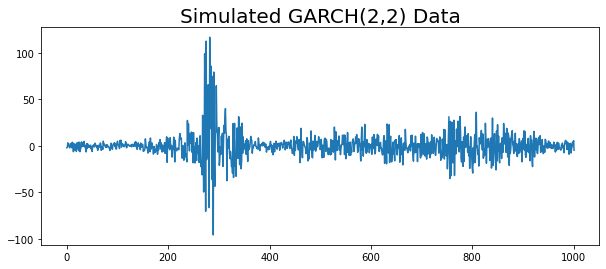

In [20]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.title('Simulated GARCH(2,2) Data', fontsize=20)

Text(0.5, 1.0, 'Data Volatility')

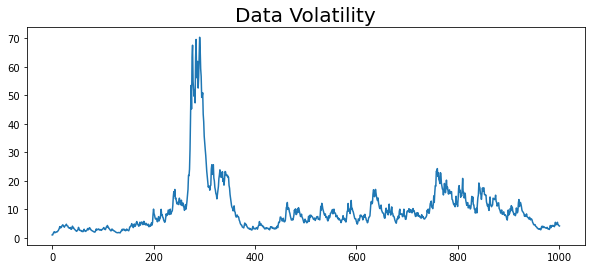

In [21]:
plt.figure(figsize=(10,4))
plt.plot(vols)
plt.title('Data Volatility', fontsize=20)

Text(0.5, 1.0, 'Data and Volatility')

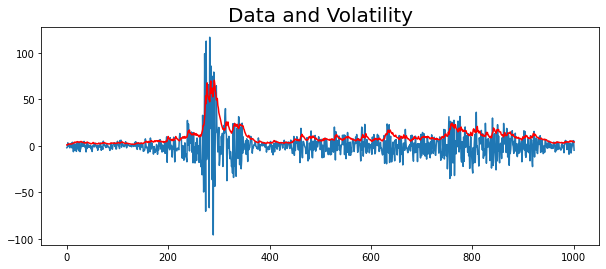

In [22]:
plt.figure(figsize=(10,4))
plt.plot(series)
plt.plot(vols, color='red')
plt.title('Data and Volatility', fontsize=20)

# PACF Plot

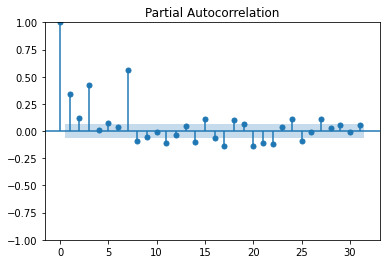

In [23]:
plot_pacf(np.array(series)**2)   # 小于0.2太多，可以认为是白噪声
plt.show()

# Fit the GARCH Model

In [24]:
train, test = series[:-test_size], series[-test_size:]

In [25]:
model = arch_model(train, p=2, q=2)

In [26]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 1024230843.2994733
Iteration:      2,   Func. Count:     17,   Neg. LLF: 8117.796322135821
Iteration:      3,   Func. Count:     26,   Neg. LLF: 3408.995162863472
Iteration:      4,   Func. Count:     34,   Neg. LLF: 3216.3364008114004
Iteration:      5,   Func. Count:     42,   Neg. LLF: 3180.8721938632284
Iteration:      6,   Func. Count:     50,   Neg. LLF: 3188.0056112605216
Iteration:      7,   Func. Count:     58,   Neg. LLF: 3167.0909324070376
Iteration:      8,   Func. Count:     66,   Neg. LLF: 3171.3341089440555
Iteration:      9,   Func. Count:     74,   Neg. LLF: 3158.3549484620316
Iteration:     10,   Func. Count:     82,   Neg. LLF: 3156.162846315725
Iteration:     11,   Func. Count:     89,   Neg. LLF: 3156.0895952740498
Iteration:     12,   Func. Count:     96,   Neg. LLF: 3156.08210231997
Iteration:     13,   Func. Count:    103,   Neg. LLF: 3156.0741489519905
Iteration:     14,   Func. Count:    110,   Neg. LLF: 31

In [27]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3156.07
Distribution:                  Normal   AIC:                           6324.15
Method:            Maximum Likelihood   BIC:                           6352.98
                                        No. Observations:                  902
Date:                Mon, Apr 03 2023   Df Residuals:                      901
Time:                        07:56:20   Df Model:                            1
                               Mean Model                               
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
mu            -0.1157      0.172     -0.674      0.501 [ -0.452,  0.221]
                              Volatility Model                             
===========================================================================
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.5929      0.307      1.932  5.335e-02 [-8.552e-03,  1.194]
alpha[1]       0.0786  4.762e-02      1.650  9.888e-02 [-1.475e-02,  0.172]
alpha[2]       0.1467  5.815e-02      2.522  1.166e-02  [3.270e-02,  0.261]
beta[1]        0.6236      0.215      2.903  3.701e-03    [  0.203,  1.045]
beta[2]        0.1511      0.179      0.846      0.398    [ -0.199,  0.501]
===========================================================================

Covariance estimator: robust
"""

# Predict

In [28]:
predictions = model_fit.forecast(horizon=test_size)

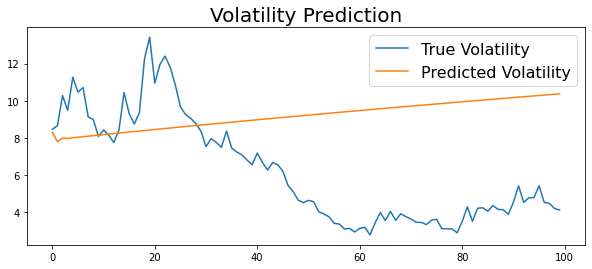

In [29]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:]) 
preds, = plt.plot(np.sqrt(predictions.variance.values[-1, :])) # 指定预测的步数，即未来的时间点数
plt.title('Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

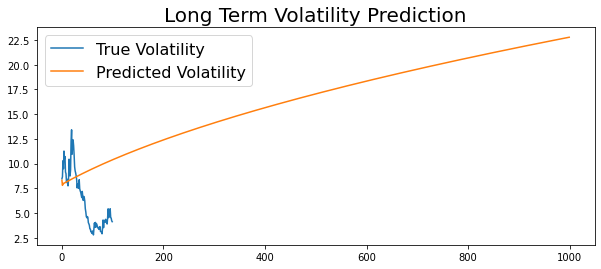

In [30]:
predictions_long_term = model_fit.forecast(horizon=1000)
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(np.sqrt(predictions_long_term.variance.values[-1, :]))
plt.title('Long Term Volatility Prediction', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

# Rolling Forecast Origin

Rolling Forecast Origin (RFO) 是时间序列分析中一种常用的交叉验证方法。其基本思想是通过在每一次预测中移动预测起点，来获取多个预测值。在每一次预测中，使用历史数据拟合模型，然后对未来的一段时间进行预测，然后移动预测起点到下一个时间点，再进行一次拟合和预测，直到预测到最后一个时间点。这样可以得到多个预测值，可以用来计算模型的平均误差、标准差等指标，评估模型的准确性和可靠性。

In [33]:
rolling_predictions = []
for i in range(test_size):
    train = series[:-(test_size-i)]
    model = arch_model(train, p=2, q=2)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

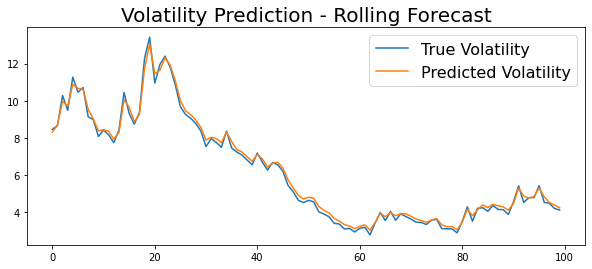

In [32]:
plt.figure(figsize=(10,4))
true, = plt.plot(vols[-test_size:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20) #波动率预测
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)